In [510]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [544]:
class linear_regression():
    def __init__(self, test_data, training_data, test_df, training_df,df,col_names,error_list,betas_model, regsk,resultsman, dfavg, dfval):
        self.trainingdata = training_data
        self.testdata = test_data
        self.trainingdf = training_df
        self.testdf = test_df
        self.df = df
        self.columnnames = col_names
        self.errorlist = error_list
        self. betasbymodel = betas_model
        self.skmodel = regsk
        self.manualres = resultsman
        self.averagedf = dfavg
        self.validateddf = dfval
    def describe(self):
        print(self.df.describe())
    def graph_histogram(self,column_name,from_df):
        try:
            if(from_df == 'Training'):
                print("Training Data Histogram for", format(column_name))
                sns.displot(self.trainingdf[column_name], kde=True,height=6, aspect=2,)
            elif(from_df == 'Test'):
                print("Test Data Histogram for", format(column_name))
                sns.displot(self.testdf[column_name], kde=True,height=6, aspect=2,)
            else:
                print("Data Histogram for", format(column_name))
                sns.displot(self.df[column_name], kde=True,height=6, aspect=2,)
        except:
            print('Error en datos de entrada')
    def graph_correlation(self):
        col_name_list = self.columnnames
        var_to_compare = col_name_list.pop(0)
        for item in col_name_list:
            corr_val = self.df[var_to_compare].corr(self.df[item])
            plt.scatter(self.df[item], self.df[var_to_compare], color = 'hotpink')
            plt.title("Correlacion " +str(var_to_compare)+ " - "+ item + " " + str("%.2f" % corr_val))
            plt.xlabel(item)
            plt.ylabel(var_to_compare)
            plt.show()
    def model_training(self, vector_x_name, vector_y_name, epochs, learning_rate):
        vector_x = self.trainingdf[vector_x_name].to_numpy()
        vector_y = self.trainingdf[vector_y_name].to_numpy()
        n = len(vector_x)
        zx = np.ones(n)
        mat = np.array([vector_x.astype(object),zx.astype(object)]).transpose()
        betas = np.array([97087,45614])
        betas_gradient = np.array([1,1])
        epoch_counter = 0
        error_vector = np.array([])
        results_vector = np.array([])
        results = {}
        while epoch_counter < epochs:
            y_hat = np.dot(mat,betas)
            t1 = [(a-b)**2 for a,b in zip(vector_y,y_hat)]
            error = (1/(2*n))*(sum(t1))
            error_vector = np.append(error_vector,error)
            yh_minus_y = y_hat - vector_y
            yh_minus_y_mat = np.array([yh_minus_y,yh_minus_y])
            res = np.multiply(mat.transpose(),yh_minus_y_mat).transpose()
            betas_gradient = np.sum((res/n),axis=0)
            betas[0] = betas[0] - (learning_rate * betas_gradient[1])
            betas[1] = betas[1] - (learning_rate * betas_gradient[0])
            results_vector = np.append(results_vector,betas)
            epoch_counter += 1
        rr = results_vector.reshape(int(results_vector.shape[0]/2),2)
        counter = 0
        for items in rr:
            counter += 1
            results[counter] = items
        self.errorlist = error_vector
        self. betasbymodel = results
        self.graph_error()
        self.graph_model_evolution()
        self.sklearn_model(vector_x_name,vector_y_name)
        self.predictions(vector_x_name)
        self.model_validation(vector_x_name)
    def graph_error(self):
        plt.scatter(np.arange(1, len(self.errorlist)+1, 1), self.errorlist, color = 'hotpink')
        plt.title("Error de datos predecidos")
        plt.xlabel("iteracion")
        plt.ylabel("error")
        plt.show()
    def graph_model_evolution(self):
        modeldict = self.betasbymodel
        x = np.linspace(0,100,100)
        counter = 0
        colors = ['red','blue','green','orange']
        for key in modeldict:
            y = modeldict[key][0]*x+modeldict[key][1]
            plt.plot(x, y, '-r', label='modelo '+str(key), color=colors[counter])
            plt.title('Comparacion de modelos')
            plt.xlabel('x', color='#1C2835')
            plt.ylabel('y', color='#1C2833')
            plt.legend(loc='upper left')
            if (counter == len(colors)-1):
                counter = 0
            else:
                counter += 1
        plt.grid()
        plt.show()
    def sklearn_model(self, vector_x_name, vector_y_name):
        var = self.trainingdf[vector_x_name].to_numpy().reshape(-1, 1)
        reg = LinearRegression().fit(var,self.trainingdf[vector_y_name].to_numpy())
        self.skmodel = reg
    def predictions(self, vector_x_name):
        vector_x = self.trainingdf[vector_x_name].to_numpy()
        n = len(vector_x)
        zx = np.ones(n)
        mat = np.array([vector_x.astype(object),zx.astype(object)]).transpose()
        last_key = list(self.betasbymodel.keys())[-1]
        betas = np.array([kev.betasbymodel[list(kev.betasbymodel.keys())[-1]][0],kev.betasbymodel[list(kev.betasbymodel.keys())[-1]][1]])
        predicted_manual_model = np.dot(mat,betas)
        vector_x_reshaped = vector_x.reshape(-1, 1)
        predicted_sk_model = self.skmodel.predict(vector_x_reshaped)
        predicted_average = (predicted_manual_model + predicted_sk_model)/2
        dfres = pd.DataFrame({'Manual Model': predicted_manual_model, 'sklearn Model': predicted_sk_model, 'Average': predicted_average})
        self.averagedf = dfres
    def model_validation(self, vector_x_name):
        vector_x = self.testdf[vector_x_name].to_numpy()
        n = len(vector_x)
        zx = np.ones(n)
        mat = np.array([vector_x.astype(object),zx.astype(object)]).transpose()
        last_key = list(self.betasbymodel.keys())[-1]
        betas = np.array([kev.betasbymodel[list(kev.betasbymodel.keys())[-1]][0],kev.betasbymodel[list(kev.betasbymodel.keys())[-1]][1]])
        predicted_manual_model = np.dot(mat,betas)
        vector_x_reshaped = vector_x.reshape(-1, 1)
        predicted_sk_model = self.skmodel.predict(vector_x_reshaped)
        col_name_list = self.columnnames
        var_to_compare = col_name_list.pop(0)
        vector_y = self.testdf[var_to_compare].to_numpy()
        error_manual_model = vector_y - predicted_manual_model
        error_sklearn_model = vector_y - predicted_sk_model
        dfvalidated = pd.DataFrame({'Actual Price': vector_y,'Manual Model': predicted_manual_model, 'sklearn Model': predicted_sk_model,'Manual Model Error': error_manual_model,'sklearn Model Error': error_sklearn_model})
        self.validateddf = dfvalidated
        x = np.linspace(0,len(vector_y),len(vector_y))
        plt.figure(figsize=(15, 10))
        plt.plot(x, vector_y, '-r', label='precio actual', color='green')
        plt.plot(x, predicted_manual_model, '-r', label='modelo manual', color='red')
        plt.plot(x, predicted_sk_model, '-r', label='modelo sklearn', color='blue')
        plt.title('Comparacion de error en modelos')
        plt.xlabel('x', color='#1C2835')
        plt.ylabel('y', color='#1C2833')
        plt.legend(loc='upper left')
        plt.grid()
        plt.show()
    @classmethod
    def from_file(cls, filename, training_percent):
        data = np.load(filename)
        training_data_percent = training_percent
        test_data_percent = 100-training_data_percent
        training_data_samples = int(data.shape[0] * (training_data_percent*0.01))
        random_indexes = np.random.choice(data.shape[0], size=training_data_samples, replace=False)
        training_data = data[random_indexes,:]
        test_data = np.delete(data,random_indexes,axis=0)
        columns_names = ['SalePrice','OverallQuality','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage']
        dftraining = pd.DataFrame(training_data, columns = columns_names)
        dftest = pd.DataFrame(test_data, columns = columns_names)
        df = pd.DataFrame(data, columns = columns_names)
        x = 0
        y = 0
        beta_0 = 0
        beta_1 = 0
        error = 0
        betas = 0
        skreg = 0
        resm = 0
        avdf = 0
        dfvalid = 0
        return cls(test_data, training_data,dftest,dftraining,df,columns_names,error,betas,skreg, resm, avdf, dfvalid)
    

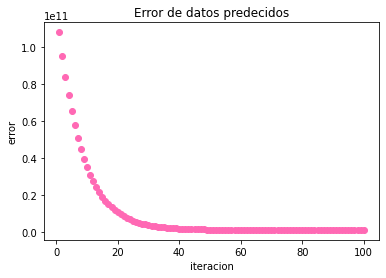

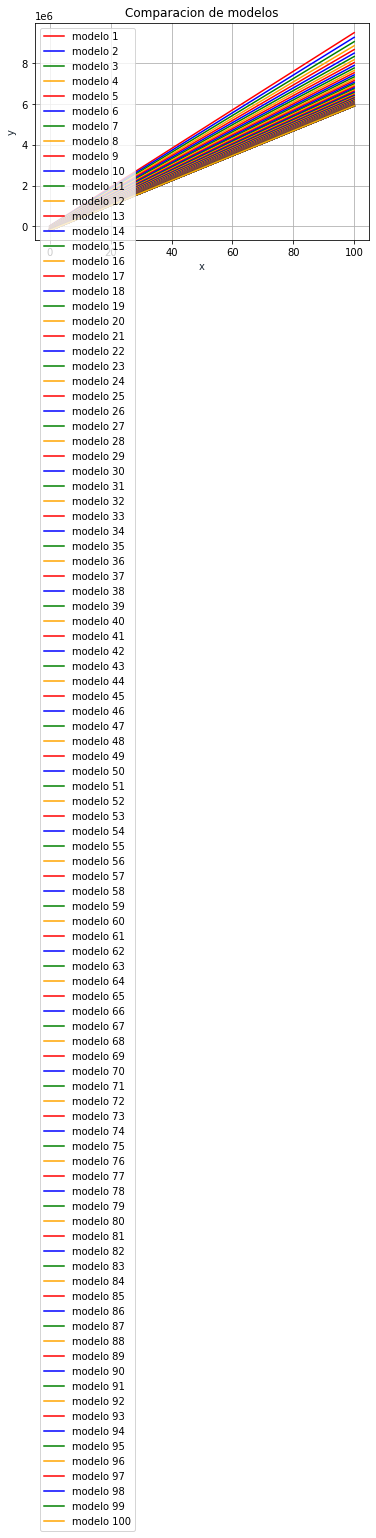

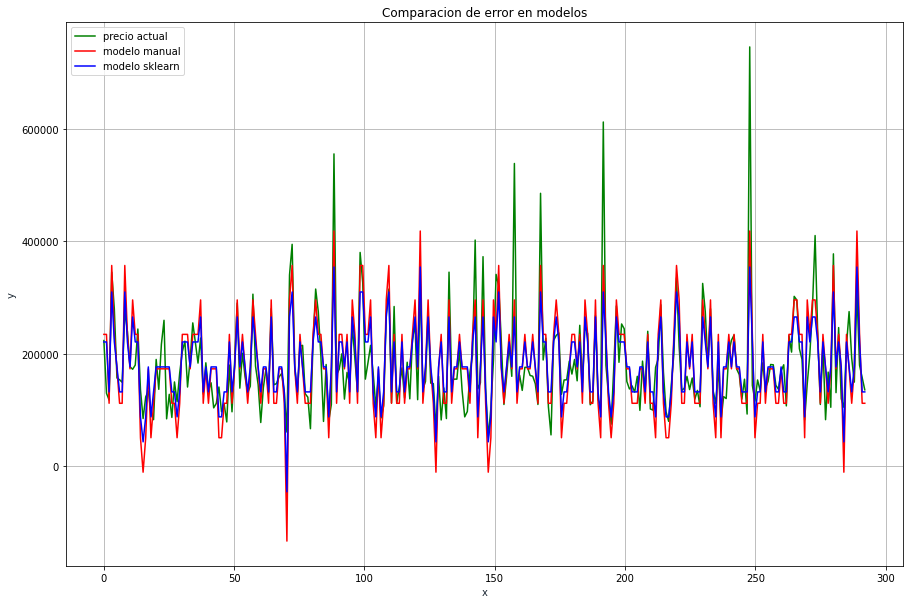

In [551]:
kev = linear_regression.from_file('proyecto_training_data.npy',80)
kev.model_training('OverallQuality','SalePrice',100,0.005)

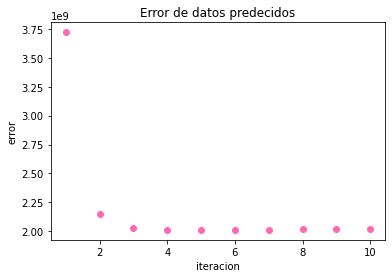

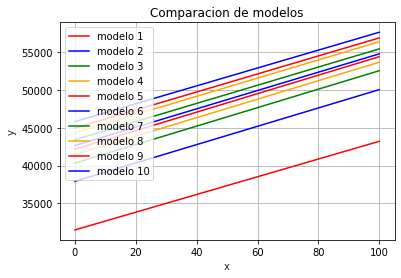

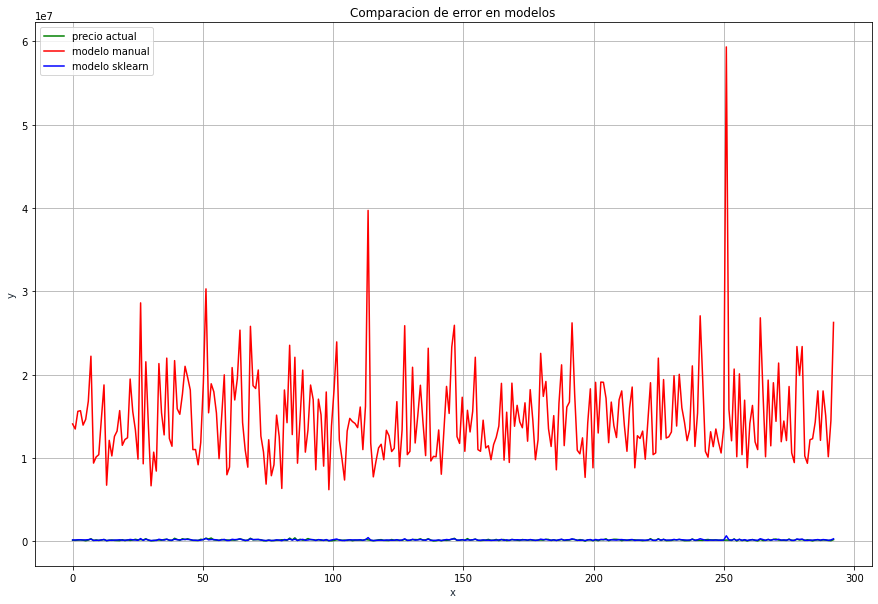

In [519]:
kev1 = linear_regression.from_file('proyecto_training_data.npy',80)
kev1.model_training('1stFlrSF','SalePrice',10,0.0003)

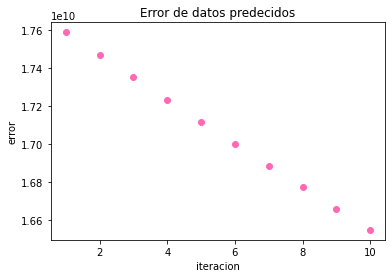

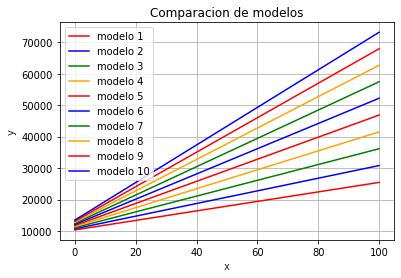

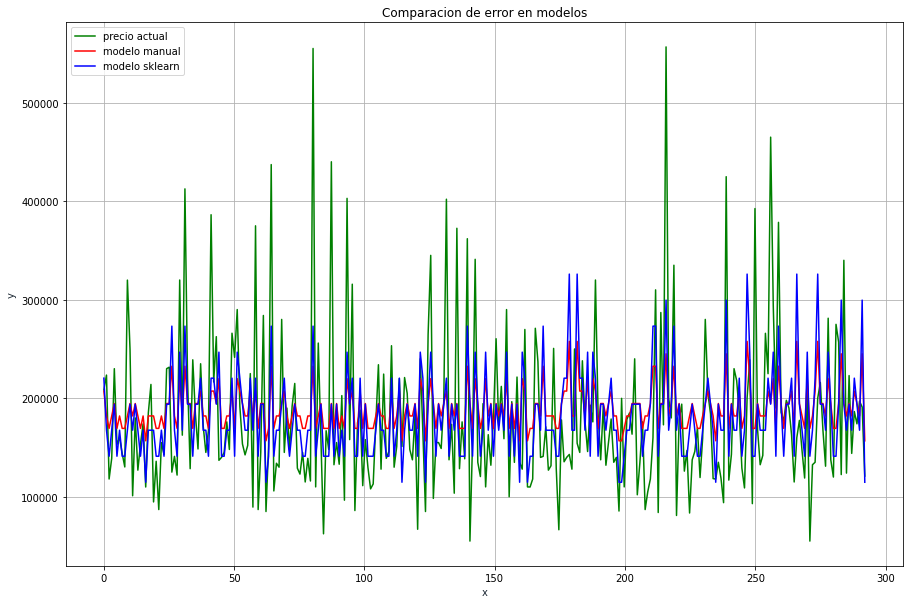

In [520]:
kev2 = linear_regression.from_file('proyecto_training_data.npy',80)
kev2.model_training('TotRmsAbvGrd','SalePrice',10,0.0003)

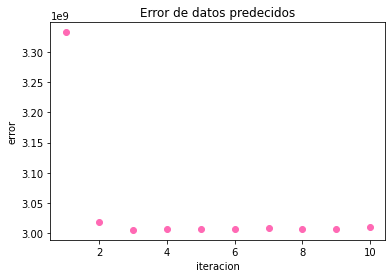

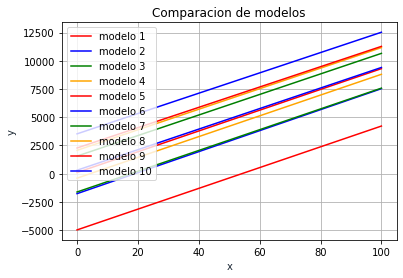

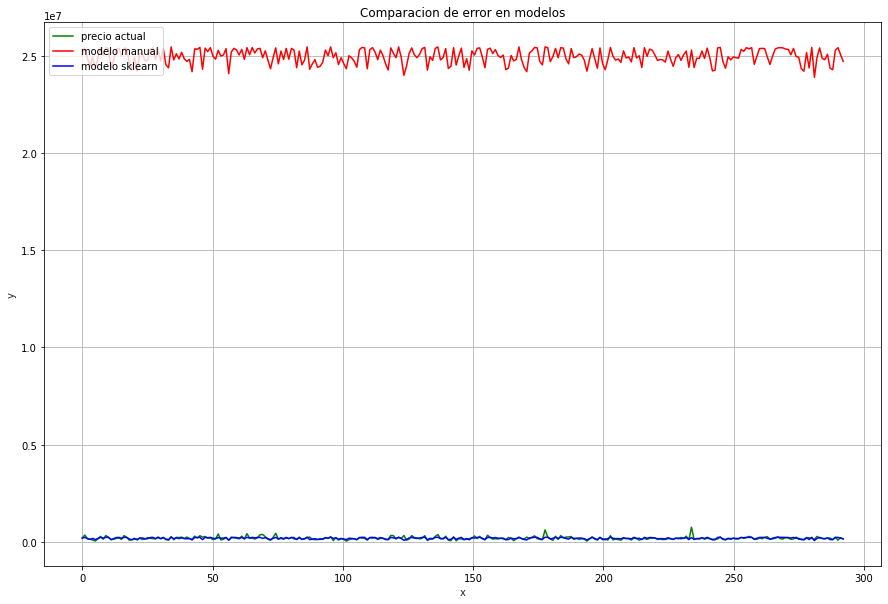

In [521]:
kev3 = linear_regression.from_file('proyecto_training_data.npy',80)
kev3.model_training('YearBuilt','SalePrice',10,0.0003)

In [522]:
kev4 = linear_regression.from_file('proyecto_training_data.npy',80)
kev4.model_training('LotFrontage','SalePrice',10,0.0003)

ValueError: cannot convert float NaN to integer

In [547]:
kev.skmodel.coef_

array([45728.88400641])

In [548]:
kev.skmodel.intercept_

-98092.68896028196

In [546]:
kev.validateddf

,Actual Price,Manual Model,sklearn Model,Manual Model Error,sklearn Model Error
0,129900.0,233555.0,222009.499085,-103655.0,-92109.499085
1,129500.0,111417.0,130551.731072,18083.0,-1051.731072
2,90000.0,50348.0,84822.847065,39652.0,5177.152935
3,139000.0,111417.0,130551.731072,27583.0,8448.268928
4,325300.0,294624.0,267738.383091,30676.0,57561.616909
...,...,...,...,...,...
287,157900.0,111417.0,130551.731072,46483.0,27348.268928
288,92000.0,111417.0,130551.731072,-19417.0,-38551.731072
289,145000.0,111417.0,130551.731072,33583.0,14448.268928
290,84500.0,111417.0,130551.731072,-26917.0,-46051.731072
